# Preprocessing Dataset #1: Adults

In [37]:
import pandas as pd

# 1. Load the datasets into Pandas dataframes
names1=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'over-50K']
dataset1 = pd.read_csv('adult.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')
print(dataset1.shape)

(32561, 15)


## Clean the data

In [38]:
# Remove instances with missing/invalid data entries
dataset1.dropna(axis=0, how='any', inplace=True)
print(dataset1.shape)

(30162, 15)


In [39]:
# Encode Over 50K as 1
dataset1['over-50K'] = dataset1['over-50K'].map({'>50K': 1, '<=50K': 0})

In [40]:
# Encode Male as 1
dataset1['sex'] = dataset1['sex'].map({'Male': 1, 'Female': 0})

In [41]:
dataset1['native-country'].describe()

count             30162
unique               41
top       United-States
freq              27504
Name: native-country, dtype: object

Since 91% of native-country data is US, we will categorize this column as "US" and "non-US".

In [42]:
import numpy as np
# Encode US as 1 and non-US as 0
dataset1['native-country'] = np.where(dataset1['native-country']=='United-States', 1, 0)

## Visualization

In [43]:
import matplotlib.pyplot as plt

In [44]:
dataset1['race'].describe()

count     30162
unique        5
top       White
freq      25933
Name: race, dtype: object

(array([25933.,     0.,  2817.,     0.,     0.,   895.,     0.,   286.,
            0.,   231.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

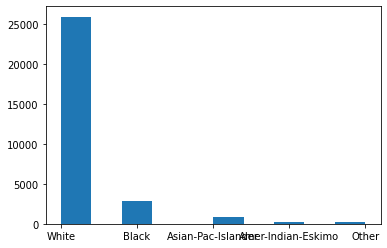

In [45]:
plt.hist(dataset1['race'], histtype='bar')

(array([  511.,  1877.,  1995., 16582.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

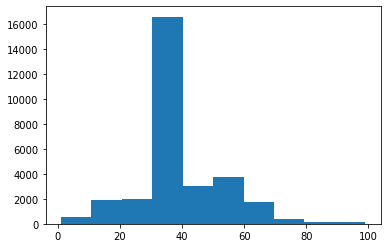

In [46]:
plt.hist(dataset1['hours-per-week'], histtype='bar')

(array([14884.,  1048.,  2082.,  6678.,  1565.,   375.,  1849.,   288.,
          865.,   528.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

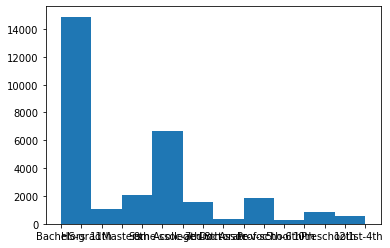

In [47]:
plt.hist(dataset1['education'], histtype='bar')

## One-hot encoding

In [48]:
from sklearn.model_selection import train_test_split

# Split into training, validation, and tests
train_1, test_1 = train_test_split(dataset1)
print(train_1.shape)
print(test_1.shape)

(22621, 15)
(7541, 15)


In [50]:
import category_encoders as ce

# Convert discrete variables into multiple variables using one-hot encoding
# Discrete columns: workclass, education, marital-status, occupation, relationship, sex, native-country
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'race', 'relationship'], use_cat_names=True)
train_encoded_1 = encoder.fit_transform(train_1)
test_encoded_1 = encoder.transform(test_1) 

/usr/local/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Preprocessing Dataset #2